In [2]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

sess = tf.InteractiveSession()

# Linear Regression

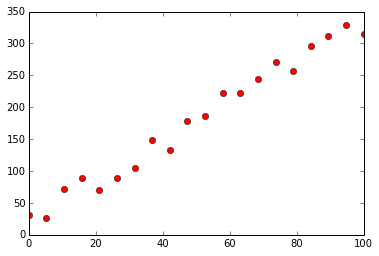

In [37]:
train_x = np.linspace(0, 100, 20)
train_y = train_x * 3.0 + np.random.rand(20)*50

plt.plot(train_x, train_y, 'ro', label='true_y')

In [52]:
x = tf.placeholder("float")
y = tf.placeholder("float")

w = tf.Variable(0.0)
b = tf.Variable(0.0)

y_ = tf.add(tf.mul(x, w), b)

cost = tf.reduce_sum(tf.pow(y_-y,2))/(train_x.shape[0])
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [58]:
# feed dict 설명하기

sess = tf.InteractiveSession()

init = tf.initialize_all_variables()
sess.run(init)

print "w\tb\tloss"

best_loss = 9999999
best = False

for epoch in range(1000):
    for batch_x, batch_y in zip(train_x, train_y)[:2]:
        sess.run(optimizer, feed_dict={x:batch_x, y:batch_y})

    if epoch % 100 == 0:
        cur_loss = cost.eval({x:train_x, y:train_y})
        
        if cur_loss < best_loss:
            best_w, best_b = w.eval(), b.eval()
            best_loss = cur_loss
            best = True
        
        if best:
            print "%.4f\t%.4f\t%.4f (best)" % (w.eval(), b.eval(), cur_loss)
        else:
            print "%.4f\t%.4f\t%.4f" % (w.eval(), b.eval(), cur_loss)
            
        best = False

w	b	loss
0.1378	0.0573	38474.6953 (best)
4.1821	3.7273	2241.8652 (best)
3.9366	6.2886	1287.7838 (best)
3.5014	8.5726	310.6677 (best)
3.0947	10.6444	400.3207
2.7248	12.5256	1325.8958
2.3889	14.2338	2863.1807
2.0839	15.7850	4833.6558
1.8069	17.1936	7096.7002
1.5553	18.4726	9542.3340


Exception AssertionError: AssertionError() in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x115e6b5d0>> ignored


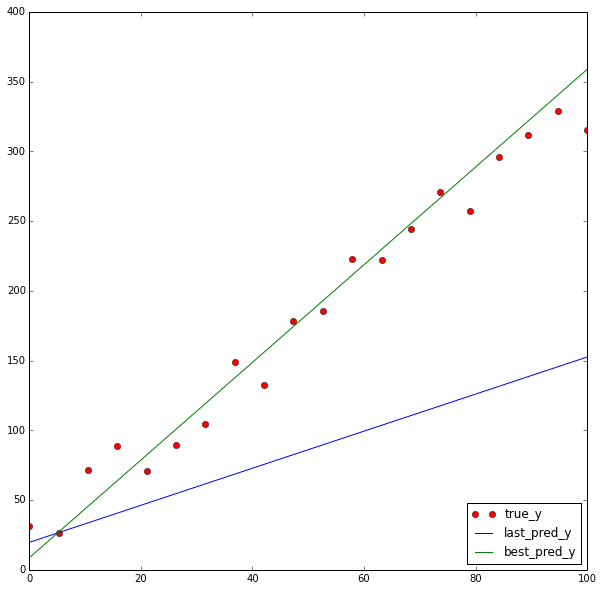

In [59]:
fig = plt.figure(figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(train_x, train_y, 'ro', label='true_y')
plt.plot(train_x, sess.run(w) * train_x + sess.run(b), label='last_pred_y')
plt.plot(train_x, best_w * train_x + best_b, label='best_pred_y')
plt.legend(loc='lower right')
plt.show()

# Nearest Neighbors

# Practice for softmax argmax ...

In [60]:
x = tf.Variable(np.array([[1., 2., -1., 1.], [1., 2., 0., 0.], [1., 0., 0., 0.]]), "float32")
y_ = tf.nn.softmax(x)

init = tf.initialize_all_variables()
sess.run(init)

print y_.eval()

[[ 0.20603191  0.56005279  0.02788339  0.20603191]
 [ 0.22451524  0.61029569  0.08259454  0.08259454]
 [ 0.47536689  0.1748777   0.1748777   0.1748777 ]]


In [61]:
x = [[1., 1., 2., 2.]]

print "reduce_sum :", tf.reduce_sum(x).eval()
print "reduce_mean :",tf.reduce_mean(x).eval()

print "column wise :", tf.argmax(np.array([[0, 0, 1],[1, 0, 0]]), 0).eval()
print "row wise :", tf.argmax(np.array([[0, 0, 1],[0, 1, 0]]), 1).eval()

reduce_sum : 6.0
reduce_mean : 1.5
column wise : [1 0 0]
row wise : [2 1]


In [62]:
# Important!!

y_ = [[0.4, 0.6, 0.2]]
y = [[0., 0., 1.]]

y = tf.Variable(y, "float64")
y_ = tf.Variable(y_, "float64")

init = tf.initialize_all_variables()
sess.run(init)

print -tf.reduce_sum(y * tf.log(y_)).eval()
print -tf.reduce_sum(y * tf.log(tf.nn.softmax(y_))).eval()
print tf.nn.softmax_cross_entropy_with_logits(y_, y).eval()

# Important!!

y_ = [[0.4, 0.6, 0.2]]
y = [[0., 1., 0.]]

y = tf.Variable(y, "float64")
y_ = tf.Variable(y_, "float64")

init = tf.initialize_all_variables()
sess.run(init)

print -tf.reduce_sum(y * tf.log(y_)).eval()
print -tf.reduce_sum(y * tf.log(tf.nn.softmax(y_))).eval()
print tf.nn.softmax_cross_entropy_with_logits(y_, y).eval()

1.60944
1.3119
[ 1.31190157]
0.510826
0.911901
[ 0.91190147]


In [23]:
x = tf.Variable([[1,2]])
y = tf.Variable([[1,2]])

init = tf.initialize_all_variables()
sess.run(init)

tmp = x * y
print tmp.eval()

print tf.ones_like(x).eval()

[[1 4]]
[[1 1]]


In [4]:
# Sigmoid cross entropy

y_ = [[0.4, 0.6, 0.2]]
y = [[0., 1., 0.]]

y = tf.Variable(y, "float64")
y_ = tf.Variable(y_, "float64")

init = tf.initialize_all_variables()
sess.run(init)

print tf.maximum(y, 1).eval()

# x - x * z + log(1 + exp(-x))
# max(x, 0) - x * z + log(1 + exp(-abs(x)))

tmp = tf.maximum(y, 0) - y * y_ + tf.log(tf.ones_like(y) + tf.exp(-y))
print tmp.eval()
print tf.nn.sigmoid_cross_entropy_with_logits(y, y_).eval()

[[ 1.  1.  1.]]
[[ 0.69314718  0.7132616   0.69314718]]
[[ 0.69314718  0.7132616   0.69314718]]


In [63]:
import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


# Logistic regression and Softmax classifier

In [64]:
x = tf.placeholder("float", [None, 784]) # 28 x 28
y = tf.placeholder("float", [None, 10])

w = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y_ = tf.matmul(x, w) + b

# cross entropy
cost1 = -tf.reduce_sum(y * tf.log(tf.nn.softmax(y_)))

# softmax cross entropy
# Measures the probability error in discrete classification tasks
# in which the classes are mutually exclusive (each entry is in exactly one class).
# For example, each CIFAR-10 image is labeled with one and only one label:
# an image can be a dog or a truck, but not both.
cost2 = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(y_, y))

# 이건 주로 multilabel classification에 사용
# Measures the probability error in discrete classification tasks
# in which each class is independent and not mutually exclusive.
# For instance, one could perform multilabel classification
# where a picture can contain both an elephant and a dog at the same time.

# `x = logits`, `z = targets`
# cost = x - x * z + log(1 + exp(-x))
# actual_cost = max(x, 0) - x * z + log(1 + exp(-abs(x))) : ensure stability and avoid overflow
cost3 = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(y_, y))

costs = []
costs.append(cost1)
costs.append(cost2)
costs.append(cost3)

optimizers = []
optimizers.append(tf.train.GradientDescentOptimizer(0.01).minimize(cost1))
optimizers.append(tf.train.GradientDescentOptimizer(0.01).minimize(cost2))
optimizers.append(tf.train.GradientDescentOptimizer(0.01).minimize(cost3))

In [65]:
training_epochs = 10
batch_size = 100

for cost, optimizer in zip(costs, optimizers):
    init = tf.initialize_all_variables()
    sess.run(init)

    print " [*] Training start"
    
    for epoch in range(training_epochs):
        total_batch = int(mnist.train.num_examples/batch_size)
        avg_loss = 0.
        
        for batch in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
            
            avg_loss += cost.eval({x: batch_xs, y: batch_ys})/total_batch
        
        if epoch % 3 == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_loss)
        
    correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    
    print " [*] Finished training : %.6f\n" % accuracy.eval({x: mnist.test.images, y: mnist.test.labels})

 [*] Training start
Epoch: 0001 cost= 29.860479714
Epoch: 0004 cost= 20.507172802
Epoch: 0007 cost= 19.761128715
Epoch: 0010 cost= 19.179987183
 [*] Finished training : 0.920400

 [*] Training start
Epoch: 0001 cost= 30.687084276
Epoch: 0004 cost= 20.483635046
Epoch: 0007 cost= 19.664463752
Epoch: 0010 cost= 19.120669614
 [*] Finished training : 0.918600

 [*] Training start
Epoch: 0001 cost= 89.729611012
Epoch: 0004 cost= 56.728791351
Epoch: 0007 cost= 55.062640131
Epoch: 0010 cost= 54.285323431
 [*] Finished training : 0.913200



# Neural Network

In [66]:
x = tf.placeholder("float", [None, 784])
y = tf.placeholder("float", [None, 10])

w_h = tf.Variable(tf.random_normal([784, 625], stddev=0.01))
w_o = tf.Variable(tf.random_normal([625, 10], stddev=0.01))

out_h = tf.nn.sigmoid(tf.matmul(x, w_h))
y_ = tf.matmul(out_h, w_o)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_, y))
train = tf.train.GradientDescentOptimizer(0.05).minimize(cost)

pred_op = tf.argmax(y_, 1)

In [67]:
training_epochs = 10
batch_size = 100

init = tf.initialize_all_variables()
sess.run(init)

for epoch in range(10):
    total_batch = int(mnist.train.num_examples/batch_size)
    avg_loss = 0.

    for batch in range(total_batch): 
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(train, feed_dict={x: batch_xs, y: batch_ys})
        
        avg_loss += cost.eval({x: batch_xs, y: batch_ys})/total_batch
        
    if epoch % 3 == 0:
        print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_loss)

correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

print accuracy.eval({x: mnist.test.images, y: mnist.test.labels})

Epoch: 0001 cost= 1.810535145
Epoch: 0004 cost= 0.418705889
Epoch: 0007 cost= 0.336711687
Epoch: 0010 cost= 0.308029606
0.9138


In [68]:
x = tf.placeholder("float", [None, 784])
y = tf.placeholder("float", [None, 10])

w_h1 = tf.Variable(tf.random_normal([784, 625], stddev=0.01))
w_h2 = tf.Variable(tf.random_normal([625, 128], stddev=0.01))
w_o = tf.Variable(tf.random_normal([128, 10], stddev=0.01))

out_h1 = tf.nn.sigmoid(tf.matmul(x, w_h1))
out_h2 = tf.nn.sigmoid(tf.matmul(out_h1, w_h2))
y_ = tf.matmul(out_h2, w_o)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_, y))
train = tf.train.GradientDescentOptimizer(0.05).minimize(cost)

pred_op = tf.argmax(y_, 1)

In [69]:
init = tf.initialize_all_variables()
sess.run(init)

for epoch in range(10):
    total_batch = int(mnist.train.num_examples/batch_size)
    avg_loss = 0.

    for batch in range(total_batch): 
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(train, feed_dict={x: batch_xs, y: batch_ys})
        
        avg_loss += cost.eval({x: batch_xs, y: batch_ys})/total_batch
        
    if epoch % 3 == 0:
        print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_loss)

correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

print accuracy.eval({x: mnist.test.images, y: mnist.test.labels})

Epoch: 0001 cost= 2.291072860
Epoch: 0004 cost= 2.292162473
Epoch: 0007 cost= 2.087677311
Epoch: 0010 cost= 1.135891468
0.6633


In [70]:
init = tf.initialize_all_variables()
sess.run(init)

for epoch in range(30):
    total_batch = int(mnist.train.num_examples/batch_size)
    avg_loss = 0.

    for batch in range(total_batch): 
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(train, feed_dict={x: batch_xs, y: batch_ys})
        
        avg_loss += cost.eval({x: batch_xs, y: batch_ys})/total_batch
        
    if epoch % 3 == 0:
        print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_loss)

correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

print accuracy.eval({x: mnist.test.images, y: mnist.test.labels})

Epoch: 0001 cost= 2.291446992
Epoch: 0004 cost= 2.291896371
Epoch: 0007 cost= 2.110376457
Epoch: 0010 cost= 1.023630695
Epoch: 0013 cost= 0.699558761
Epoch: 0016 cost= 0.565286022
Epoch: 0019 cost= 0.480752677
Epoch: 0022 cost= 0.419639268
Epoch: 0025 cost= 0.374518869
Epoch: 0028 cost= 0.347565093
0.9038


# Convolutional Neural Network

In [100]:
x_data = np.ones([3., 3.]).astype("float32")
print x_data
print "="*20
x_data = np.reshape(x_data, [1, 3, 3, 1])

w = np.ones([2,2])
print w
print "="*20
w = tf.cast(tf.reshape(w, [2, 2, 1, 1]), "float")
# print w.eval()

print tf.nn.conv2d(x_data, w, [1, 1, 1, 1], 'SAME').eval()
print "="*20

l1 = tf.nn.relu(tf.nn.conv2d(x_data, w, [1, 1, 1, 1], 'SAME'))
print l1.eval()
print "="*20

l2 = tf.nn.max_pool(l1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name='l1_pool')
print l2.eval()

[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
[[ 1.  1.]
 [ 1.  1.]]
[[[[ 4.]
   [ 4.]
   [ 2.]]

  [[ 4.]
   [ 4.]
   [ 2.]]

  [[ 2.]
   [ 2.]
   [ 1.]]]]
[[[[ 4.]
   [ 4.]
   [ 2.]]

  [[ 4.]
   [ 4.]
   [ 2.]]

  [[ 2.]
   [ 2.]
   [ 1.]]]]
[[[[ 4.]
   [ 2.]]

  [[ 2.]
   [ 1.]]]]


In [101]:
# tf.nn.dropout
# With probability keep_prob, outputs the input element scaled up by 1 / keep_prob,
# otherwise outputs 0. The scaling is so that the expected sum is unchanged.

l3 = tf.nn.dropout(l2, 0.5, name='l1')
print l3.eval()
print "="*20

x_pool = tf.nn.dropout(x_data, 0.5, name='l1')
print x_pool.eval()

[[[[ 8.]
   [ 4.]]

  [[ 0.]
   [ 2.]]]]
[[[[ 2.]
   [ 0.]
   [ 0.]]

  [[ 0.]
   [ 2.]
   [ 2.]]

  [[ 2.]
   [ 0.]
   [ 2.]]]]


In [102]:
# reference : http://cs231n.github.io/convolutional-networks/

x = tf.placeholder("float", [None, 28*28])
y = tf.placeholder("float", [None, 10])

# [batch, in_height, in_width, in_channels]
x_3d = tf.reshape(x, [-1, 28, 28, 1])

def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

# [filter_height, filter_width, in_channels, out_channels]
w1 = init_weights([3, 3, 1, 32])
w2 = init_weights([3, 3, 32, 64])
w3 = init_weights([3, 3, 64, 128])
w4 = init_weights([128 * 4 * 4, 625])
w_o = init_weights([625, 10])

p_keep_conv = 0.8
p_keep_hidden = 0.5

# Must have strides[0] = strides[3] = 1.
# For the most common case of the same horizontal and vertices strides,
# strides = [1, stride, stride, 1].

# pad_along_height = ((out_height - 1) * strides[1] +
#                     filter_height - in_height)
# pad_along_width = ((out_width - 1) * strides[2] +
#                    filter_width - in_width)
# pad_top = pad_along_height / 2
# pad_left = pad_along_width / 2
l1a = tf.nn.relu(tf.nn.conv2d(x_3d, w1, [1, 1, 1, 1], 'SAME'), name='l1a')

# for case of 'SAME'
# out_height = ceil(float(in_height) / float(strides[1]))
# out_width  = ceil(float(in_width) / float(stides[2]))

# ksize : The size of the window for each dimension of the input tensor.
# strides : 
l1 = tf.nn.max_pool(l1a, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name='l1_pool')
l1 = tf.nn.dropout(l1, p_keep_hidden, name='l1')

# output : batch x 14 x 14 x 32

l2a = tf.nn.relu(tf.nn.conv2d(l1, w2, [1, 1, 1, 1], 'SAME'))
l2 = tf.nn.max_pool(l2a, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
l2 = tf.nn.dropout(l2, p_keep_hidden)

# output : batch x 7 x 7 x 64

l3a = tf.nn.relu(tf.nn.conv2d(l2, w3, [1, 1, 1, 1], 'SAME'))
l3 = tf.nn.max_pool(l3a, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# output : batch x 4 x 4 x 128

l3 = tf.reshape(l3, [-1, w4.get_shape().as_list()[0]]) # = 128 * 4 * 4
l3 = tf.nn.dropout(l3, p_keep_hidden)

l4 = tf.nn.relu(tf.matmul(l3, w4))
l4 = tf.nn.dropout(l4, p_keep_hidden)

# output : batch x 625

y_ = tf.matmul(l4, w_o)

# output : batch x 10

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_, y))
train = tf.train.GradientDescentOptimizer(0.05).minimize(cost)

pred_op = tf.argmax(y_, 1)

In [99]:
init = tf.initialize_all_variables()
sess.run(init)

for epoch in range(10):
    total_batch = int(mnist.train.num_examples/batch_size)
    avg_loss = 0.

    for batch in range(total_batch): 
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(train, feed_dict={x: batch_xs, y: batch_ys})
        
        avg_loss += cost.eval({x: batch_xs, y: batch_ys})/total_batch
        
    if epoch % 3 == 0:
        print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_loss)

correct_prediction = tf.equal(tf.argmax(y_, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

print accuracy.eval({x: mnist.test.images, y: mnist.test.labels})

Epoch: 0001 cost= 2.302579639
Epoch: 0004 cost= 2.302520615
Epoch: 0007 cost= 2.225800073
Epoch: 0010 cost= 0.231174564
0.9308
